# PHYS 381 Assignment 7

Gisu Ham 10134838

# Introduction

# Questions

For questions \#1 and \#2, only use the 12 monthly CO2 measurements from 2000 for the y-variable, and use t = np.arange(0,12)/12.0 for the x-variable.

For question \#3 use the entire CO2 data set from 1960 to present.

## Question \#1

Use the pseudo-inverse approach to fit polynomial models to the data.  Try all polynomials from N=1 (linear) to N=11.
Calculate $\chi2$ and the condition number (ratio of largest to smallest eigenvalue) for each case.  Tabulate and/or plot the results.  Briefly comment on which model(s) you think should be used.  

## Question \#2

Use the pseudo-inverse approach to fit harmonic models of the form

 $$ f_n(x) = a_0 + \sum_n \left [ b_n \, \cos \left( n {2 \pi t} \right) + c_n \sin\left( n {2 \pi t} \right) \right ]$$
 
for n=1 to as high as you can.  

Calculate $\chi2$ and the condition number (ratio of largest to smallest eigenvalue) for each case.  Tabulate and/or plot the results.  Briefly comment on which model(s) you think should be used.

## Question \#3

Use the pseudo-inverse approach to fit a hybrid model of the form

 $$ h_n(x) = a_0 + a_1 t + a_2 t^2 + a_3 \cos \left( {2 \pi t} + \phi \right) $$
 
to the entire CO2 data set (note that some trig identities may be useful).  Discuss your results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sy
import math
import random

In [2]:
#get data from co2.txt
data1=np.genfromtxt('co2.txt')
# Data has 7 columns. define a list containing 7 lists, each list containing one of the column
column_space=[[],[],[],[],[],[],[]]

for z in range(0,7):
    for i in range(0,len(data1)):
        column_space[z].append(data1[i][z])

Below code makes sure that I have correctly extracted the index of the data corresponidng to the year 2000

In [3]:

check_data_2000=[]
index_set=[]

for i in range(0,len(column_space[0])):
    if column_space[0][i]==2000:
        check_data_2000.append(column_space[0][i])
        index_set.append(i)

print(check_data_2000)
print(index_set)

[2000.0, 2000.0, 2000.0, 2000.0, 2000.0, 2000.0, 2000.0, 2000.0, 2000.0, 2000.0, 2000.0, 2000.0]
[502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513]


First I import poly_fit from the previous assignment to fit polynomials without using Pseudo Inverse just as an exercise.

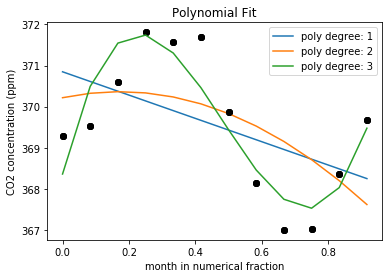

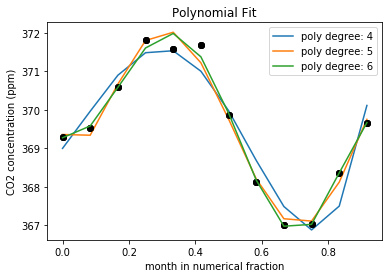

In [4]:
check_data_2000=[]
index_set=[]

for i in range(0,len(column_space[0])):
    if column_space[0][i]==2000:
        check_data_2000.append(column_space[0][i])
        index_set.append(i)
t = np.arange(0,12)/12.0

def poly_fit_2000(p,Plot_fig=True):
    y=[]
    t = np.arange(0,12)/12.0
    
    for i in range(0,12):
        y.append(column_space[4][index_set[i]])

    
    fit_data=np.polyfit(t,y,p)
    poly_func=np.poly1d(fit_data)

    yfit=[]
    for i in range(0,len(t)):
        yfit.append(poly_func(t[i]))
    
    plt.plot(t,y,'ko',color='k')
    plt.plot(t,yfit,label="poly degree: "+str(p))
    plt.title("Polynomial Fit")
    plt.xlabel('month in numerical fraction')
    plt.ylabel('CO2 concentration (ppm)')
    plt.legend()

    
for i in range(1,4):
    poly_fit_2000(i)
plt.show()
for i in range(4,7):
    poly_fit_2000(i)
plt.show()


Now I fit using pseudo inverse method

In [5]:
def fit_poly_pseudo(x, y, npoly=1, verbose_plot=False):
    """
    Use Moore-Penrose pseudo inverse to fit polynomials to data.
    """
    kern = np.zeros([len(x), npoly+1])
    for degree in range(npoly+1):
        kern[:,degree] = x**degree
    kTk =  np.dot(kern.T, kern)
    kerninv = np.linalg.inv( kTk )
    eigvals = np.linalg.eigvals(kerninv)
    
    model = np.dot( kerninv, np.dot(kern.T, y) )
    residuals = y - np.dot(kern, model)
    chi2 = np.sum( residuals**2 )
            
    if verbose_plot is True:
        plt.plot(eigvals, 'bp-')
        plt.yscale('log')
        plt.ylabel('eigenvalue log-magnitude')
    return kern, kTk, kerninv, eigvals, model, chi2

In [6]:
def pseudo_fit_1(p,Plot_fit=False):
    """
    Polynomial fit and generate a plot 
    arguments: (p,Plot,fit=False) = {integer,boolean}
    returns: chi_square,condition_number
    """
    #preparation for fit.
    data_2000=[]
    t = np.arange(0,12)/12.0
    for i in range(0,12):
        data_2000.append(column_space[4][index_set[i]])

        
    #fitting
    fit_data=fit_poly_pseudo(t,data_2000,npoly=p)
    #creating function using polyval
    yfunc = np.polyval(fit_data[4][::-1],t)
    #[::-1] used here flips the order of the list of model because polyval begins with order 0 initially.
    
    chi_square=fit_data[5]
    pos_eig=np.abs(np.array(fit_data[3])) #need to make every eigenvalues positive for the purpose of avoiding negative condition number
    condition_number=max(pos_eig)/min(pos_eig)
    
    #plots
    plt.plot(t,data_2000,'ko',color='k',label='data',markersize=3.14159265358979323846264338327950288419716939937510582097)
    plt.plot(t,yfunc,color='r',label='model')
    plt.title('Pseudo Inverse fit of CO2 Mole Fraction in the year 2000 ysing Degree '+str(p)+' Polynomial')
    plt.ylabel('mole fraction of CO2(ppm)')
    plt.xlabel('month of the year represented in fraction of denominator 12')
    plt.legend()
    plt.show()
    
    return chi_square,condition_number

Now I create the plot of polynomial degree 1-11 and create a table of chi square and condition numbers

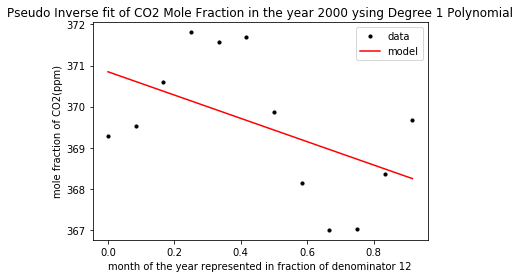

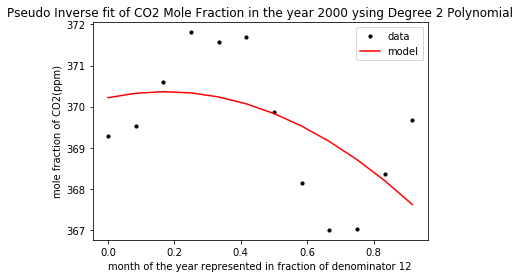

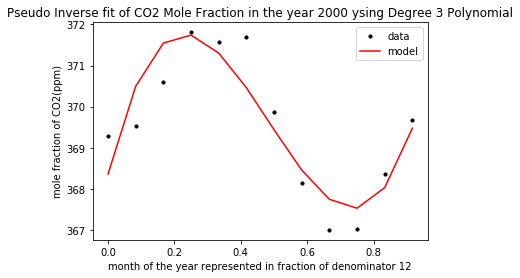

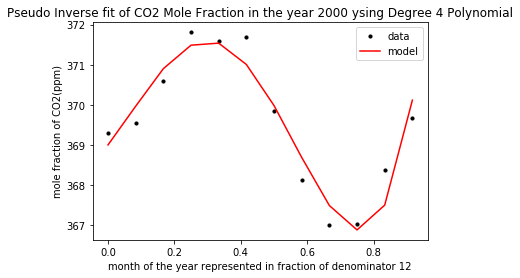

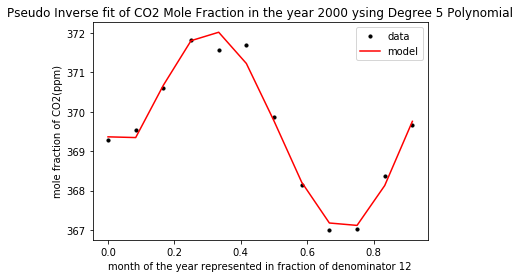

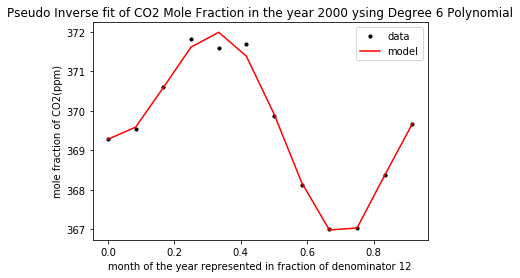

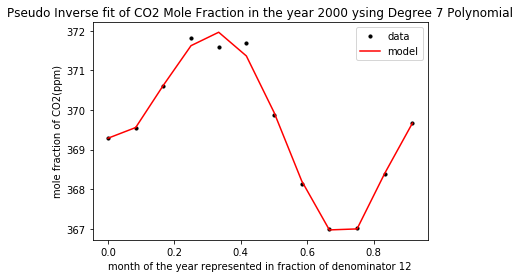

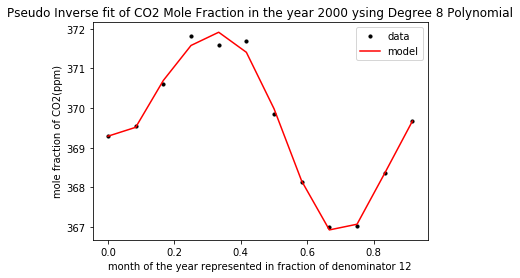

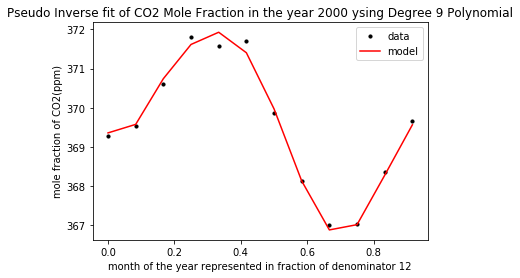

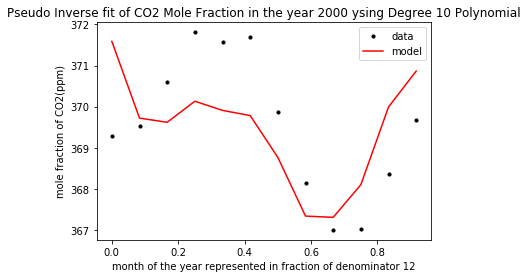

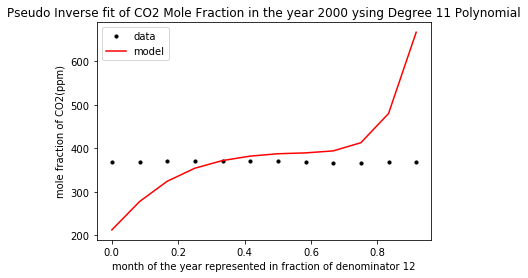

polynomial degree               Chi_square          Condition_number    
1                               23.409002           18.141865           
2                               21.828639           469.943992          
3                               5.525979            13782.338580        
4                               2.487408            443479.966799       
5                               0.587098            15717593.593190     
6                               0.316793            624315437.644370    
7                               0.310095            28582470687.716450  
8                               0.283005            1572913911598.306152
9                               0.319365            111258383217339.375000
10                              22.694329           11915709320430074.000000
11                              139614.850607       445101727188042752.000000


In [7]:
chi_square_list=[]
cond_list=[]

for i in range(1,12):
    c=pseudo_fit_1(i,Plot_fit=True)
    chi_square_list.append(c[0])
    cond_list.append(c[1])

    
print ('%-32s%-20s%-20s' % ('polynomial degree','Chi_square','Condition_number'))
for i in range(0,11):
    print ('%-32i%-20f%-20f' % (i+1,chi_square_list[i],cond_list[i]))

When deciding which model should be used, I assess the models based on three criteria.
1. Overall fit quality through qualitative inspection of the plots (winners: 5,6,7,8,9)
2. Chi square (winners: 3,4,5,6,7,8,9)
3. Condition number (winners: 1,2,3,4,5)

All three criterias have 5 in common, so polynomial of degree 5 should be used. But I can see that polynomial of degree 6 is also a very good candidate if we can overlook its relatively high condition number (624e6 compared to 15e6 of deg 5).

Now I fit the fourier series

$$ f_n(x) = a_0 + \sum_n \left [ b_n \, \cos \left( n {2 \pi t} \right) + c_n \sin\left( n {2 \pi t} \right) \right ]$$

In [8]:
def fit_fourier_pseudo(t,y,n):
    """Use Moore-Penrose pseudo inverse to fit Fourier Series to the data"""
    
    kern=np.zeros([len(t),2*n+1])
    for coeff in range(1,2*n+1):
        if coeff%2==1:    # odd, then set kern's column as cos
            kern[:,coeff]=np.cos((coeff+1)/2*2*math.pi*t)
        elif coeff%2==0:    #even, then set kern's column as sin
            kern[:,coeff]=np.sin(coeff/2*2*math.pi*t)
        else:
            print("something is wrong")
    kern[:,0]=1.0
        
    kTk =  np.dot(kern.T, kern)
    kerninv = np.linalg.inv( kTk )
    eigvals = np.linalg.eigvals(kerninv)
    
    model = np.dot( kerninv, np.dot(kern.T, y) )
    residuals = y - np.dot(kern, model)
    chi2 = np.sum( residuals**2 )
    
    return kern, kTk, kerninv, eigvals, model, chi2

In [9]:
def fit_fourier(n):
    """Fit the Fourier series into the data
    argument: (n)={integer} denotes number of sin and cosine pairs produved in the function
    """
    data_2000=[]
    t = np.arange(0,12)/12.0
    for i in range(0,12):
        data_2000.append(column_space[4][index_set[i]])
        
    returned=fit_fourier_pseudo(t,data_2000,n)
    
    model=returned[4]
    chi_square=returned[5]
    pos_eig=np.abs(np.array(returned[3]))
    condition_number=max(pos_eig)/min(pos_eig)
    fitted_data_list=[]
    for val in t:
        fitted_y=model[0]
        for i in range(1,len(model)):
            if i%2==1:    # odd
                fitted_y+=model[i]*np.cos((i+1)/2*2*math.pi*val)
            elif i%2==0:    #even
                fitted_y+=model[i]*np.sin(i/2*2*math.pi*val)
            else:
                print("something is wrong")
        fitted_data_list.append(fitted_y)

    plt.plot(t,data_2000,'ko',color='k',markersize=4.11231231,label='data')
    plt.plot(t,fitted_data_list,color='r',label='model')
    plt.title('Pseudo Inverse Fourier Fit of CO2 Mole Fraction in the year 2000 using n= '+str(n))
    plt.ylabel('mole fraction of CO2(ppm)')
    plt.xlabel('month of the year represented in fraction of denominator 12')
    plt.legend()
    plt.show()
    #yfunc = np.polyval(fit_data[4][::-1],t)
    return chi_square,condition_number

Now I plot the results as well as tables of chi squares and condition numbers

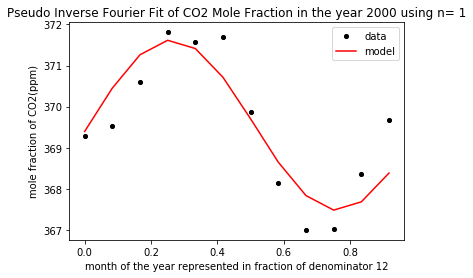

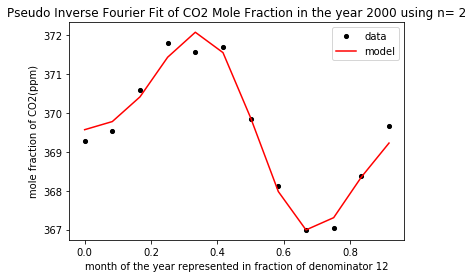

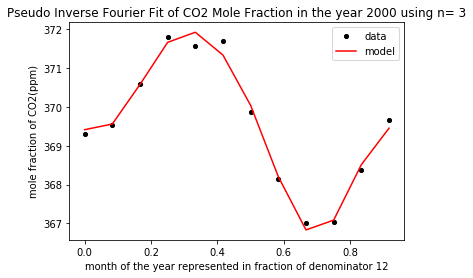

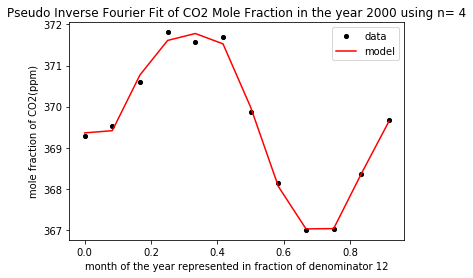

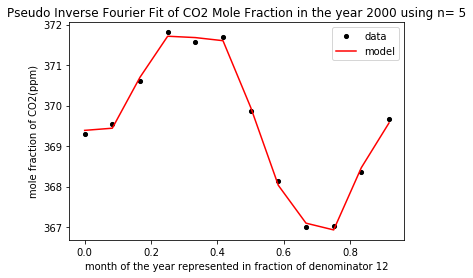

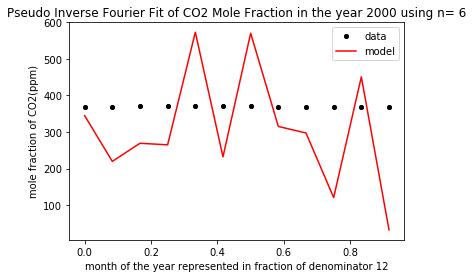

C:\Users\David\Miniconda3\lib\site-packages\ipykernel\__main__.py:15: RuntimeWarning: divide by zero encountered in double_scalars


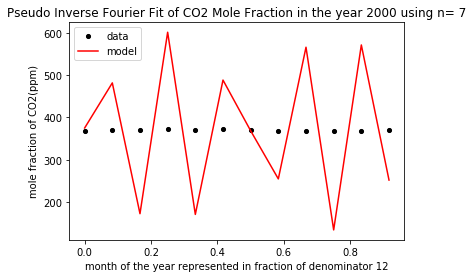

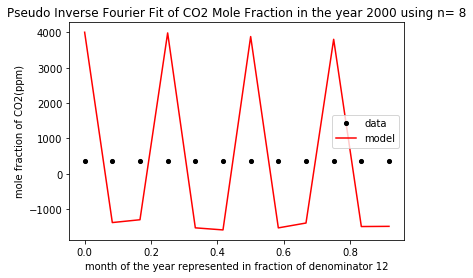

value of n                  Chi_square                    Condition_number    
1                           5.637878                      2.000000            
2                           0.877062                      2.000000            
3                           0.424195                      2.000000            
4                           0.180878                      2.000000            
5                           0.116033                      2.000000            
6                           333435.021105                 3334609487321813009435329427205976704598147072.000000
7                           319383.078750                 inf                 
8                           77427166.363455               inf                 


In [10]:
chi_square_list=[]
cond_list=[]
for i in range(1,9):
    c=fit_fourier(i,)
    chi_square_list.append(c[0])
    cond_list.append(c[1])

    
print ('%-28s%-30s%-20s' % ('value of n','Chi_square','Condition_number'))
for i in range(0,8):
    print ('%-28i%-30f%-20f' % (i+1,chi_square_list[i],cond_list[i]))

Similar to Polynomial fit, I attempt to assess the models based on three criteria.

1. Overall fit quality through qualitative inspection of the plots (winners: 3,4)
2. Chi square (winners: 1,2,3,4,5)
3. Condition number (winners: 1,2,3,4,5)


Therefore models 3 and 4 should be used.

As a side note, after n=6, pseudo inverse is no longer able to generate a reasonable fit. I suspect this is because there are more parameter coefficients (for n=6, there are 13) than the number of data points (12). But I'm not certain how this translates into the matrix representations and operations in pseudo inverse.

 Lastly, I fit the hybrid function given in the question 3:
 $$ h_n(x) = a_0 + a_1 t + a_2 t^2 + a_3 \cos \left( {2 \pi t} + \phi \right) $$

When using linear square fit, choice of basis functions is arbitrary (but some give better fits) with only one constraint. They need to be in the form of linear equation
$$J_n=\sum_{j=0}^{M}m_j\phi_i(x_j)+c_j$$
where there are $M+1$ distinct basis functions $\phi_i$ (*In general the functions need not be distinct, but if they are identical, we can always combine them wlog by defining a new coefficient.)

Without providing mathematical proof, it's pretty obvious that the hybrid function cannot be put into such form because the phase term $\phi$ of $a_3cos(2\pi t+\phi)$ must also be treated as one of the coefficient $m_k$ for some natural number $k\leq M$, but cos is not linear with respect to sum:

$$cos(2\pi t+\phi)\neq \phi(cos(2\pi t))$$

. Therefre I use trigonometry identity to change basis function from $cos(2\pi t+\phi)$ to some other basis.



$$cos(2\pi t+\phi)=cos^2(\pi t)cos(\phi)-sin^2(\pi t)cos(\phi)-2sin(\pi t)cos(\pi t)sin(\phi)$$
$$=(cos^2(\pi t)-sin^2(\pi t))cos(\phi)-2sin(\pi t)cos(\pi t)sin(\phi)$$

So now there are total of 5 basis functions.
Below is a matrix representation of relationship between data points and the model to be uesd to apply pseudo inverse fit where the right most vector represents the collection of model parameters.

\begin{equation*}
\begin{vmatrix}
y_1\\
y_2\\
y_3\\
y_4\\
y_5\\
\\
\vdots
\end{vmatrix}=
\begin{vmatrix}
1 & t_o  & t_o^2 &(cos^2(\pi t_o)-sin(\pi t_o))& 2sin(\pi t_o)cos(\pi t_o)\\
1 & t_1  & t_1^2 &(cos^2(\pi t_1)-sin(\pi t_1))& 2sin(\pi t_1)cos(\pi t_1)\\
  &&&\vdots&&\\
  &&&\vdots&&\\
 &&&\vdots&& \\
 \\
\end{vmatrix}
\begin{vmatrix}
a_0\\
a_1\\
a_2\\
a_3cos(\phi)\\
a_3sin(\phi)\\
\end{vmatrix}
\end{equation*}

In [11]:
def hybrid_func(t,phi): #hybrid function only containing cos term
    return math.cos(2*math.pi*t+phi)

def alternate_function(t): #alternate function obtained after using trigonometric identities
    return np.cos(np.pi*t)**2-np.sin(np.pi*t)**2,2*np.sin(np.pi*t)*np.cos(np.pi*t)

In [12]:
def fit_hybrid_pseudo(t,y):
    """Use Moore-Penrose pseudo inverse to fit Harmonics to data"""
    
    kern=np.zeros([len(t),5])
    
    kern[:,0]=1
    for i in range(1,3): # generate polynomial up to degree 2 and set kern
        kern[:,i]=t**i
    kern[:,3]=alternate_function(t)[0] #first returned value of alternate function
    kern[:,4]=alternate_function(t)[1] #second returned value of alternate function
        
    kTk =  np.dot(kern.T, kern)
    kerninv = np.linalg.inv( kTk )
    eigvals = np.linalg.eigvals(kerninv)
    
    model = np.dot( kerninv, np.dot(kern.T, y) )
    residuals = y - np.dot(kern, model)
    chi2 = np.sum( residuals**2 )
    
    return kern, kTk, kerninv, eigvals, model, chi2

In [17]:
def fit_hybrid():
    """Generates fit of the hybrid function
        No argument
        return chi square and condition number
        """
    total_data=column_space[4]
    t = np.array(column_space[2])
    
    returned=fit_hybrid_pseudo(t,total_data) # get return values
    
    model=returned[4]
    chi_square=returned[5]
    pos_eig=np.abs(np.array(returned[3]))
    condition_number=max(pos_eig)/min(pos_eig)
    
    # this determines the coefficient a_3 and phi
    phi=math.atan(model[4]/model[3])
    a3=model[4]/math.sin(phi)
    
    
    # y values obtained without using the original hybrid function
    fitted_data_list_raw=[]
    for val in t:
        fitted_y=model[0]
        fitted_y+=model[1]*val
        fitted_y+=model[2]*val**2
        fitted_y+=model[3]*alternate_function(val)[0]
        fitted_y+=model[4]*alternate_function(val)[1]
        fitted_data_list_raw.append(fitted_y)
    
    # y values obtained with using the original hybrid function
    fitted_data_list=[]
    for val in t:
        fitted_y=model[0]
        fitted_y+=model[1]*val
        fitted_y+=model[2]*val**2
        fitted_y+=a3*hybrid_func(val,phi)
        fitted_data_list.append(fitted_y)
    
    image_mult=1.45
    plt.figure(figsize=[12*image_mult,10*image_mult])
    plt.plot(t,total_data,'ko',color='r',markersize=1.61231231,label='data')
    plt.plot(t,fitted_data_list_raw,color='k',label='model',markersize=0.1)
    plt.title('Pseudo Inverse fit of CO2 Concentration using Hybrid of Polynomial and Sinusoidal Function')
    plt.ylabel('mole fraction of CO2(ppm)')
    plt.xlabel('month of the year represented in fraction of denominator 12')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=[12*image_mult,10*image_mult])
    plt.plot(t,total_data,'ko',color='r',markersize=1.61231231,label='data')
    plt.plot(t,fitted_data_list,color='k',label='model',markersize=0.1)
    plt.title('Pseudo Inverse fit of CO2 Concentration using Hybrid of Polynomial and Sinusoidal Function(original function)')
    plt.ylabel('mole fraction of CO2(ppm)')
    plt.xlabel('month of the year represented in fraction of denominator 12')
    plt.legend()
    plt.show()
    
    """"""
    plt.figure(figsize=[12*image_mult,10*image_mult])
    plt.plot(t,fitted_data_list,color='k',label='model',markersize=0.1)
    #plt.plot(t,total_data,'ko',color='r',markersize=1.61231231,label='data')
    plt.plot(t,fitted_data_list_raw,color='r',label='raw model',markersize=0.1)
    plt.title('Pseudo Inverse fit of CO2 Concentration using Hybrid of Polynomial and Sinusoidal Function (Contrast)')
    plt.ylabel('mole fraction of CO2(ppm)')
    plt.xlabel('month of the year represented in fraction of denominator 12')
    plt.legend()
    plt.show()
    
    
    
    return chi_square,condition_number

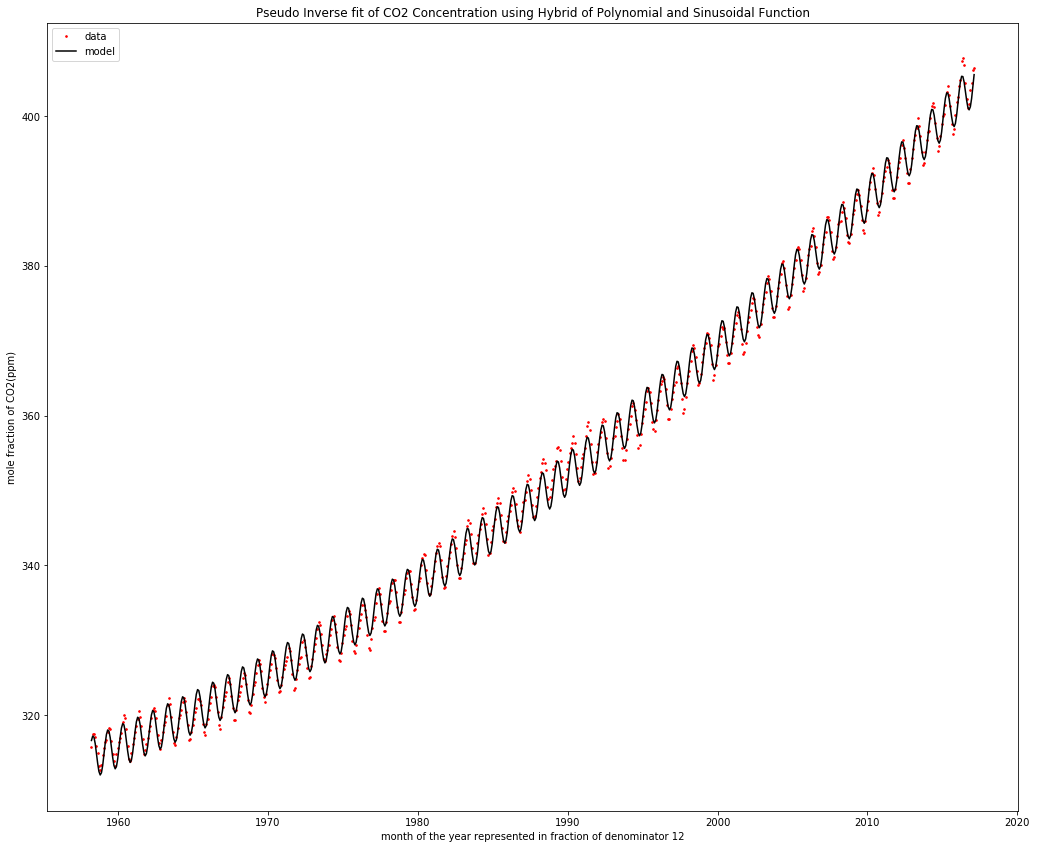

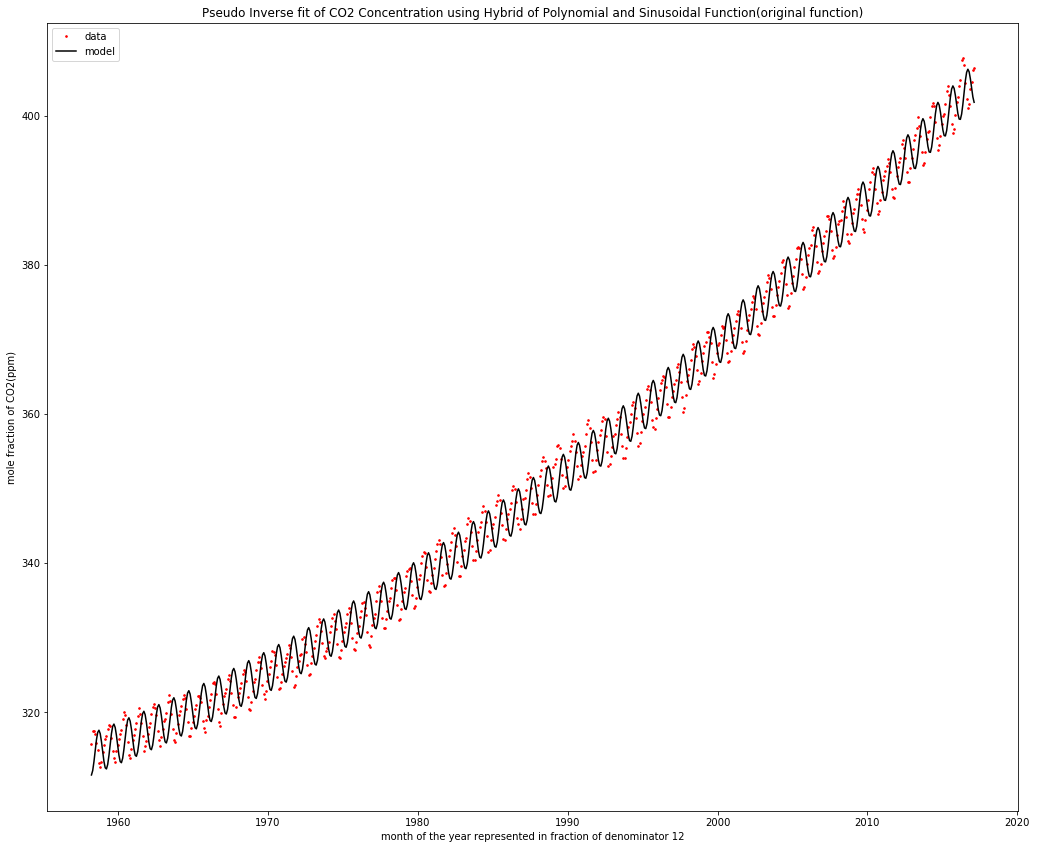

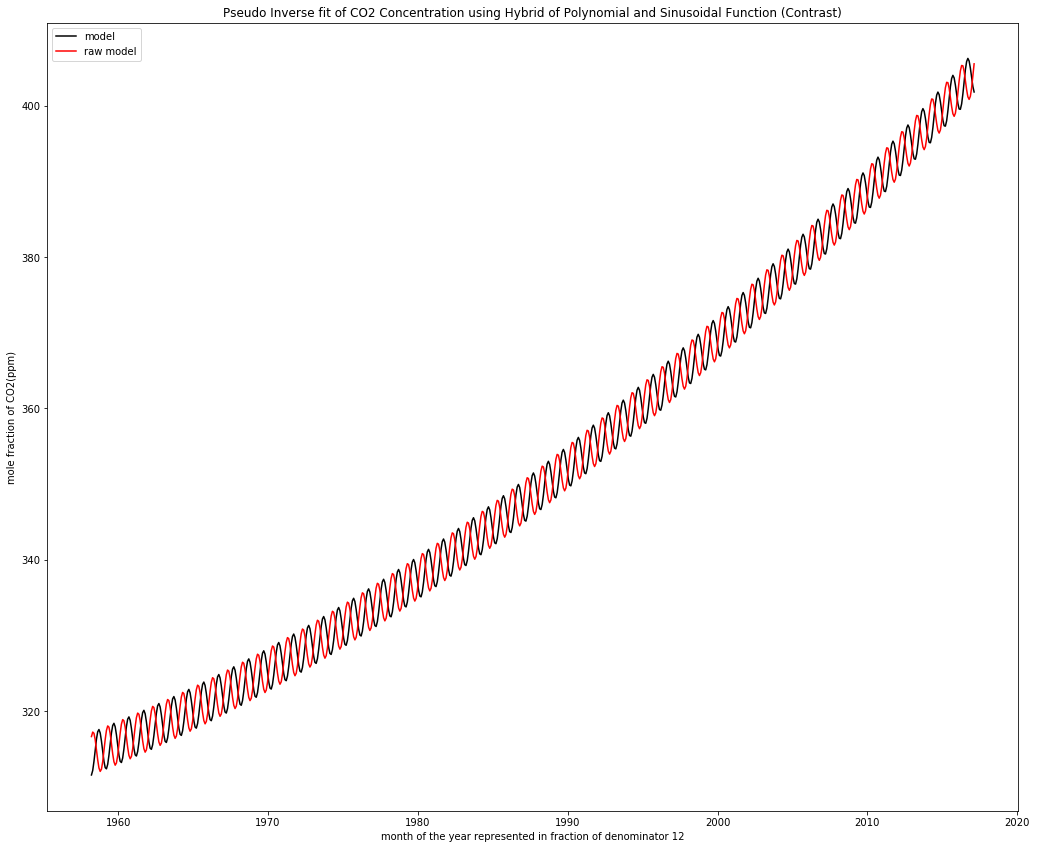

Chi square:  617.779591851
Condition number:  3.62052510801e+21


In [18]:
f=fit_hybrid()
print('Chi square: ',f[0])
print('Condition number: ',f[1])

The three plots generated above require some descriptions. 

Since I used pseudo inverse using the set of parameters $\{a_0,a_1,a_2,a_3cos(\phi),a_3sin(\phi)\}$, the first plot is a fitted function generated by using those 5 parameters using the alternate form of $cos(2\pi t+\phi)$ obtained via trig identity.

From those 'raw' set of 5 parameters above, it's a matter of simple algebra to find the values of $a_3$ and $\phi$. Thus the second plot is generated using the set of parameters $\{a_0,a_1,a_2,a_3,\phi\}$ using the original cos function.

The last plot simply compares models of the two plots above.

Because the condition number is so high (3.62e21), the process of converting the raw set of paramters into the original set of parameters introduces a non-negligible uncertainty $\Delta \phi$ so that we are actually plotting the function
$$cos(2\pi t+\phi+\Delta \phi)$$. This explains why the original function looks like it is shifted by some phase compared to the raw models. As a consequence, the original function does not fit quite well.

# Conclusion
I have fitted the data points using pseudo inverse using various basis functions including polynomials, fourier series, and hybrid of polynomial and sinuisoidal. It's clear that data fitting is not black and white, thus requires careful quantitative assessment as well as qualitative observations to find the best model for fitting.